# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Load Data

### Data Source:
https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan?resource=download

In [2]:
loan_data = pd.read_csv('/kaggle/input/eligibility-prediction-for-loan/Loan_Data.csv')

Problem Statement:

Dream Housing Finance company deals in all kinds of home loans. They want to be able to predict whether a prospective customer will be eligible for a loan or not, and therefore, have some targeted marketing campaigns. To achieve this, they would be looking for a model that most accurately predicts eligible customers. Thus, the model that most accurately predicts 'Y' as as 'Y' should be selected. That is, the model with the highest ACCURACY.

In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Certain columns with missing data:
- Gender
- Married
- Dependents
- Self_Employed
- LoanAmount
- Loan_Amount_Term
- Credit_History

Mix of numerical and categorical variables:
- Numerical Variables:
    - ApplicantIncome
    - CoapplicantIncome
    - LoanAmount
    - Loan_Amount_Term
- Categorical Variables:
    - Dependents
    - Gender
    - Married
    - Education
    - Self_Employed
    - Credit_History
    - Property_Area

Target variable is Loan_Status

In [5]:
# drop Index
data = loan_data.drop(columns = ['Loan_ID'], inplace = False)

In [6]:
data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Exploratory Data Analysis (EDA)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


Possibility of some outliers. However, most of the variables in real life will show some outliers so we should let the model learn to predict on outliers

# Numerical Features - Univariate Analysis

## Boxplot & Histogram

### ApplicantIncome

<AxesSubplot:xlabel='ApplicantIncome'>

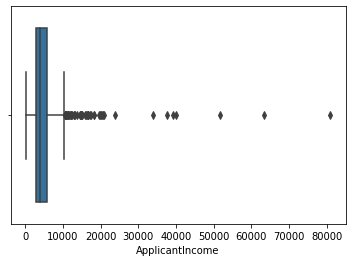

In [8]:
sns.boxplot(x=data['ApplicantIncome'])

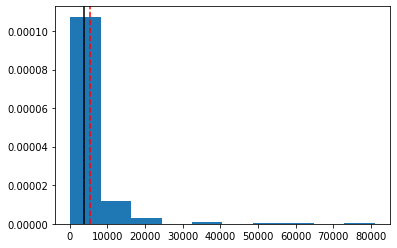

In [9]:
import matplotlib.pyplot as plt
hist = plt.hist(x=data['ApplicantIncome'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(data['ApplicantIncome'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(data['ApplicantIncome'].median(), color = 'black', linestyle='-')

Observations:
- Positiveky skewed distribution
- Outliers on right hand side, but expected with Income
- Mean and Median close enough

### CoapplicantIncome

<AxesSubplot:xlabel='CoapplicantIncome'>

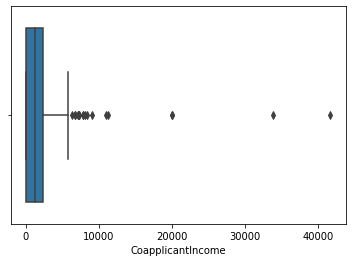

In [10]:
sns.boxplot(x=data['CoapplicantIncome'])

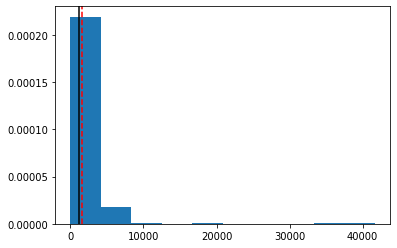

In [11]:
hist = plt.hist(x=data['CoapplicantIncome'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(data['CoapplicantIncome'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(data['CoapplicantIncome'].median(), color = 'black', linestyle='-')

Observations:
- Positiveky skewed distribution
- Outliers on right hand side, but expected with Income
- Mean and Median close enough

### LoanAmount

<AxesSubplot:xlabel='LoanAmount'>

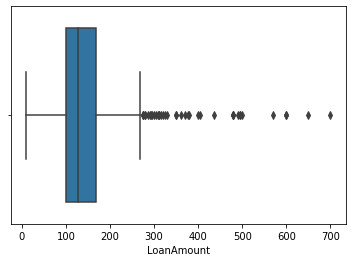

In [12]:
sns.boxplot(x=data['LoanAmount'])

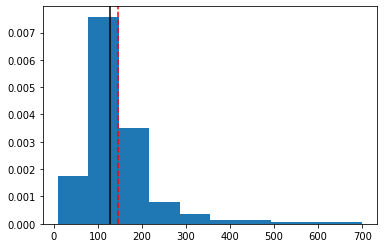

In [13]:
hist = plt.hist(x=data['LoanAmount'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(data['LoanAmount'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(data['LoanAmount'].median(), color = 'black', linestyle='-')

Observations:
- Slightly positiveky skewed distribution
- Outliers on right hand side, which may need to be treated
- Mean and Median close enough

# Categorical Features - Univariate Analysis

### Dependents

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3+')])

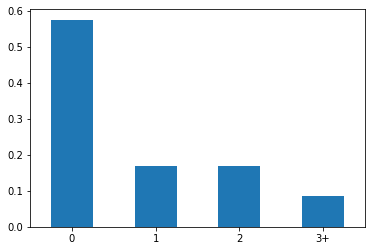

In [14]:
data['Dependents'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Almost 60% of population has 0 dependents

### Gender

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

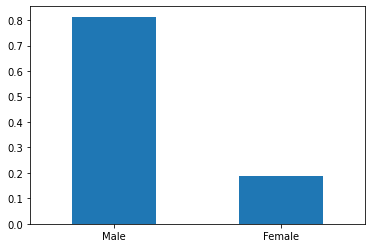

In [15]:
data['Gender'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Almost 80% of population is Male

### Married

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

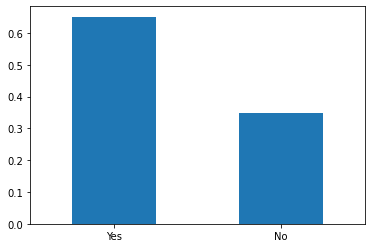

In [16]:
data['Married'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Alittle over 60% of population is Married

### Education

(array([0, 1]), [Text(0, 0, 'Graduate'), Text(1, 0, 'Not Graduate')])

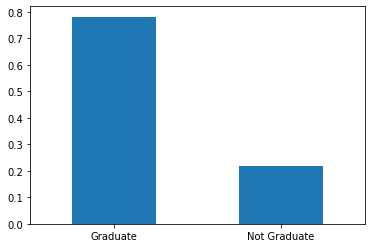

In [17]:
data['Education'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Almost 80% of population is Graduate

### Self_Employed

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

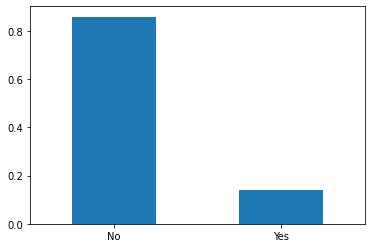

In [18]:
data['Self_Employed'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Almost 80% of population is salaried

### Credit_History

(array([0, 1]), [Text(0, 0, '1.0'), Text(1, 0, '0.0')])

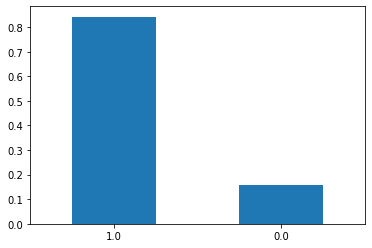

In [19]:
data['Credit_History'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Almost 80% of population has a credit history

### Property_Area

(array([0, 1, 2]),
 [Text(0, 0, 'Semiurban'), Text(1, 0, 'Urban'), Text(2, 0, 'Rural')])

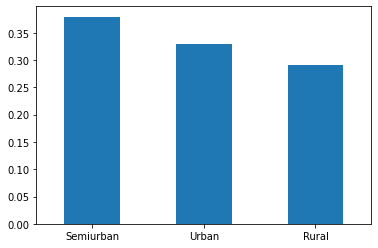

In [20]:
data['Property_Area'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Majority of population resides in Urban / Semi-Urban areas

# Bivariate / Multivariate Analysis

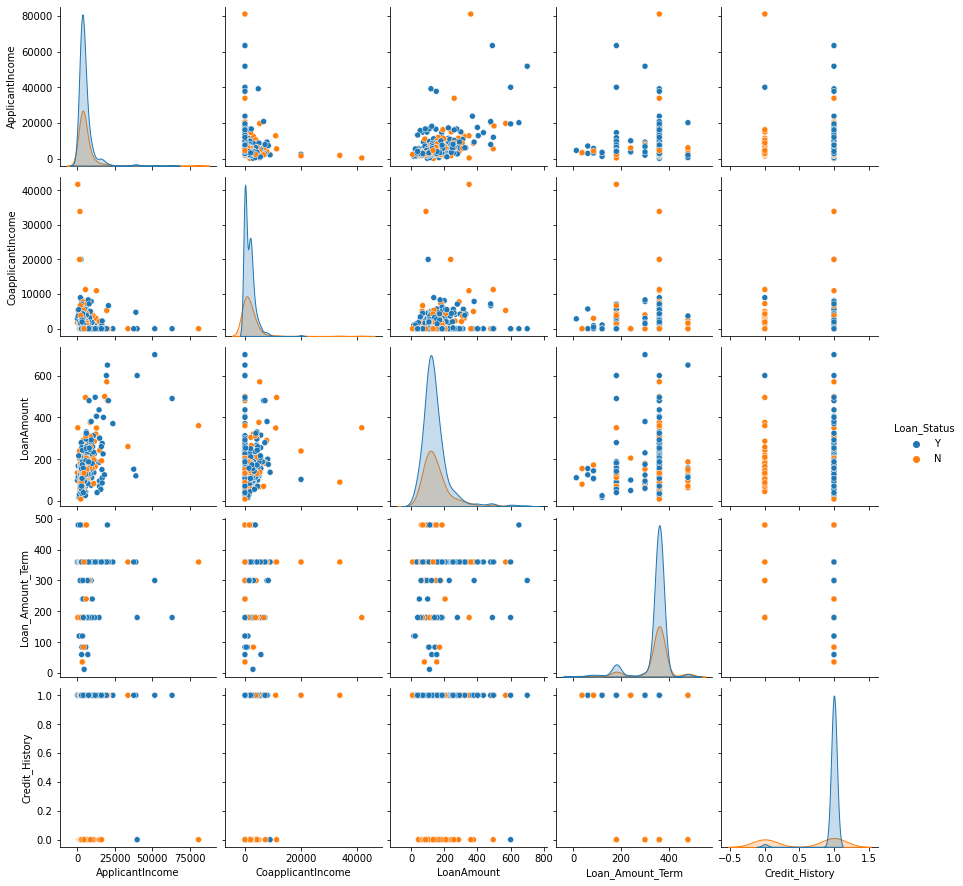

In [21]:
sns.pairplot(loan_data, diag_kind= 'kde', hue = 'Loan_Status')

In [22]:
# Identify Correlation
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [23]:
data.corr(method = 'spearman')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.320056,0.515397,-0.040111,0.043241
CoapplicantIncome,-0.320056,1.000000,0.240719,-0.013747,-0.007458
LoanAmount,0.515397,0.240719,1.000000,0.041486,-0.002361
Loan_Amount_Term,-0.040111,-0.013747,0.041486,1.000000,0.015088
Credit_History,0.043241,-0.007458,-0.002361,0.015088,1.000000


<AxesSubplot:>

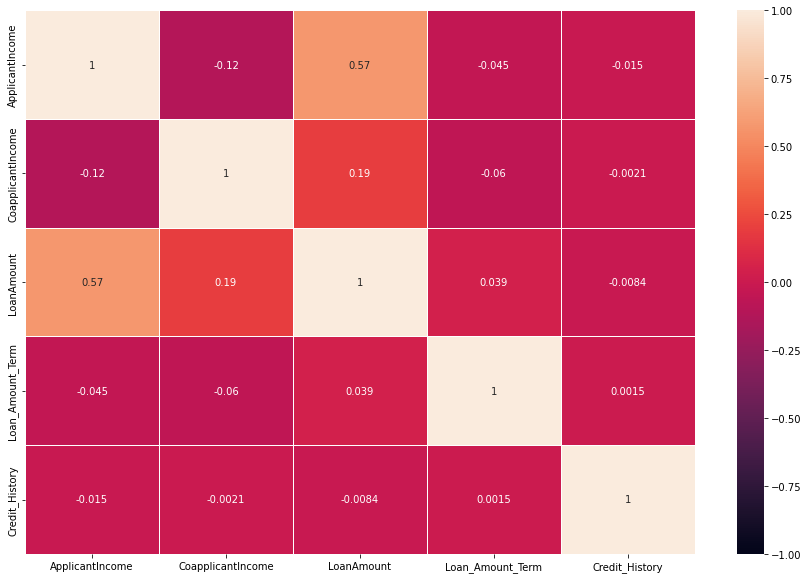

In [24]:
# Plot the Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')

<AxesSubplot:>

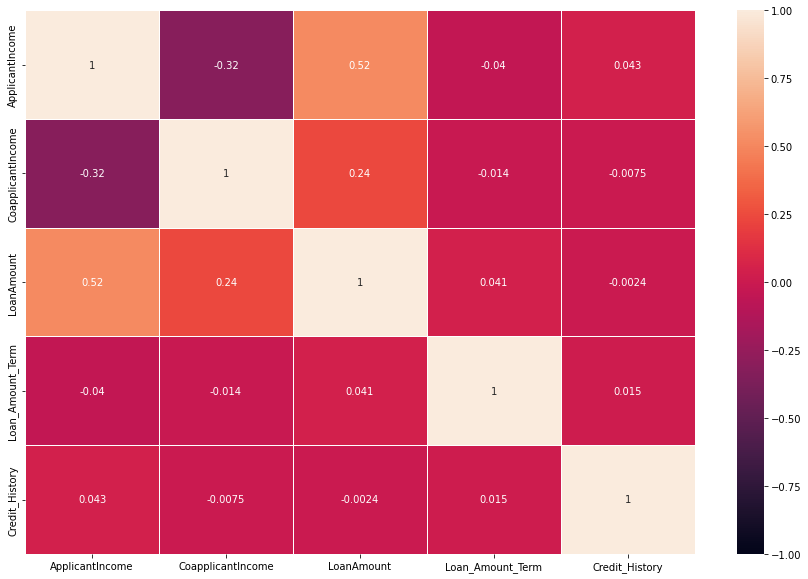

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method = 'spearman'), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')

Very high correlation between 'ApplicantIncome' and 'LoanAmount' - therefore, one of them needs to be dropped to prevent independent variable multicollinearity.

This is verified by VIF calculation shown below

In [26]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Preprocessing

## Imputing null values

In [27]:
# Imputing null for categorical variables with mode
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Education'] = data['Education'].fillna(data['Education'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [28]:
# Imputing null for numerical variables with median - mean was not chosen because of outliers in the data
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace = True)

In [29]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Detecting multicollinearity

In [30]:
# Calculating VIF for all numerical variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

vif = pd.DataFrame()
vif["features"] = x.columns
vif["vif_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,features,vif_Factor
0,ApplicantIncome,2.845794
1,CoapplicantIncome,1.458045
2,LoanAmount,6.457683
3,Loan_Amount_Term,3.753503


In [31]:
# Calculating VIF for all numerical variables except LoanAmount
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = data[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']]

vif = pd.DataFrame()
vif["features"] = x.columns
vif["vif_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,features,vif_Factor
0,ApplicantIncome,1.724216
1,CoapplicantIncome,1.287776
2,Loan_Amount_Term,2.072653


Since VIF fector has significantly reduced, it is best to drop LoanAmount from the set of independent variables

In [32]:
# Drop LoanAmount from data set
data.drop(columns = ['LoanAmount'], inplace = True)

### Balancing Dataset

In [33]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [34]:
import imblearn

In [35]:
from imblearn.over_sampling import RandomOverSampler

In [36]:
ros = RandomOverSampler(random_state=0)

In [37]:
x = data.drop(columns = ['Loan_Status'])
y = data['Loan_Status']

In [38]:
x, y = ros.fit_resample(x, y)

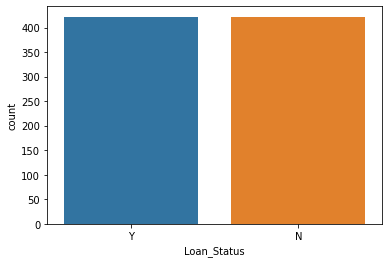

In [39]:
ax = sns.countplot(x=y)

In [40]:
df1=pd.concat([x,y],axis=1)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y


## Outlier Treatment

There are outliers in ApplicantIncome, CoapplicantIncome and Loan_Amount_Term. However, in real life, we would expect these variables to display some outliers. Therefore, it is important not to treat them

## Data Prep for Moedling

In [41]:
# OneHotEncoding of object dtype columns
cat_cols = ['Dependents','Gender','Married','Education','Self_Employed','Credit_History','Property_Area']
dummies = pd.get_dummies(df1[cat_cols])
dummies

,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1
1,1.0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0
2,1.0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1
3,1.0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1
4,1.0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,0.0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0
840,1.0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1
841,1.0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
842,0.0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0


In [42]:
#Concat dummmies into data frame
df1 = pd.concat([df1, dummies], axis = 1)

In [43]:
df1.shape

(844, 27)

In [44]:
# Drop original categorical columns from data frame
df1 = df1.drop(cat_cols, axis = 1)

In [45]:
df1.shape

(844, 19)

In [46]:
# determine whether tha target column is balanced or not
y.value_counts()

Y    422
N    422
Name: Loan_Status, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
df1['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
839    N
840    N
841    N
842    N
843    N
Name: Loan_Status, Length: 844, dtype: object

In [49]:
labelencoder = LabelEncoder()

In [50]:
# Convert the target variable into binary format
y = labelencoder.fit_transform(df1['Loan_Status'])

In [51]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [52]:
# segregate the target variable
x = df1.drop(columns = ['Loan_Status'])

# splitting data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42, stratify = y)

In [53]:
x_train.shape

(633, 18)

In [54]:
x_test.shape

(211, 18)

In [55]:
y_train.shape

(633,)

In [56]:
y_test.shape

(211,)

# Developing Classification Models

In [57]:
def get_metrics_score(clf, flag = True):
    '''
    Function to calculate the following metrics of a fitted classifier - Accuracy, Recall and Precision
    Params:
    -------
    clf: a fitted classifier to predict values
    '''

    # defining an empty list to store train and test results
    score_list=[] 
    # predict on both the training and test sets
    pred_train = clf.predict(x_train)
    pred_test = clf.predict(x_test)
    # calculate Accuracy
    train_acc = accuracy_score(y_train, pred_train)
    test_acc = accuracy_score(y_test, pred_test)
    # calculate Recall
    train_recall = recall_score(y_train, pred_train)
    test_recall = recall_score(y_test, pred_test)
    # calculate Precision
    train_precision = precision_score(y_train, pred_train)
    test_precision = precision_score(y_test, pred_test)
    # calculate F1 score
    F1_Score = f1_score(y_test, pred_test)
    # calculate ROC_AUC_score
    Roc_Auc_score = roc_auc_score(y_test, pred_test)    
    # add these scores to score_list
    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision, f1_score, roc_auc_score))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ", train_acc)
        print("Accuracy on test set : ", test_acc)
        print("Recall on training set : ", train_recall)
        print("Recall on test set : ", test_recall)
        print("Precision on training set : ", train_precision)
        print("Precision on test set : ", test_precision)
        print("F1_Score : ", F1_Score)
        print("Roc_Auc_score : ", Roc_Auc_score)
    
    return score_list # returning the list with train and test scores

# RandomForest Classifier

In [58]:
rf = RandomForestClassifier(random_state = 42, class_weight = 'balanced')
rf.fit(x_train, y_train)
predictions_rf = rf.predict(x_test)

In [59]:
predictions_rf.shape

(211,)

In [60]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

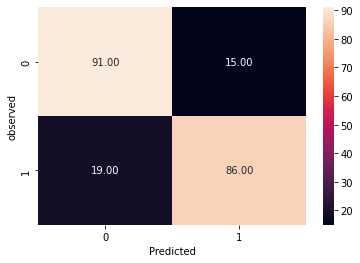

In [61]:
draw_cm(y_test, predictions_rf)

In [62]:
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       106
           1       0.85      0.82      0.83       105

    accuracy                           0.84       211
   macro avg       0.84      0.84      0.84       211
weighted avg       0.84      0.84      0.84       211



In [63]:
rf_scores = get_metrics_score(rf)

Accuracy on training set :  0.9984202211690363
Accuracy on test set :  0.8388625592417062
Recall on training set :  0.9968454258675079
Recall on test set :  0.819047619047619
Precision on training set :  1.0
Precision on test set :  0.8514851485148515
F1_Score :  0.8349514563106796
Roc_Auc_score :  0.8387690925426774


# Bagging Classifier on Random Forest

In [64]:
baggingrf = BaggingClassifier(rf, random_state = 42)
baggingrf.fit(x_train, y_train)
predictions_baggingrf = baggingrf.predict(x_test)

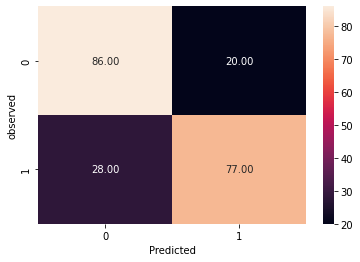

In [65]:
draw_cm(y_test, predictions_baggingrf)

In [66]:
print(classification_report(y_test, predictions_baggingrf))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       106
           1       0.79      0.73      0.76       105

    accuracy                           0.77       211
   macro avg       0.77      0.77      0.77       211
weighted avg       0.77      0.77      0.77       211



In [67]:
baggingrf_scores = get_metrics_score(baggingrf)

Accuracy on training set :  0.9699842022116903
Accuracy on test set :  0.7725118483412322
Recall on training set :  0.9621451104100947
Recall on test set :  0.7333333333333333
Precision on training set :  0.9775641025641025
Precision on test set :  0.7938144329896907
F1_Score :  0.7623762376237624
Roc_Auc_score :  0.7723270440251573


# Logistic Regression Classifier

In [68]:
lr = LogisticRegression(random_state = 42, class_weight = None)
lr.fit(x_train, y_train)
predictions_lr = lr.predict(x_test)

In [69]:
predictions_lr.shape

(211,)

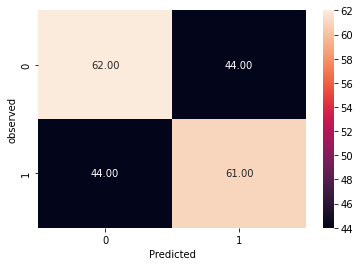

In [70]:
draw_cm(y_test, predictions_lr)

In [71]:
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58       106
           1       0.58      0.58      0.58       105

    accuracy                           0.58       211
   macro avg       0.58      0.58      0.58       211
weighted avg       0.58      0.58      0.58       211



In [72]:
logistic_regression_scores = get_metrics_score(lr)

Accuracy on training set :  0.5797788309636651
Accuracy on test set :  0.5829383886255924
Recall on training set :  0.6182965299684543
Recall on test set :  0.580952380952381
Precision on training set :  0.5747800586510264
Precision on test set :  0.580952380952381
F1_Score :  0.580952380952381
Roc_Auc_score :  0.5829290206648697


# KNN Classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier(n_neighbors = 10, algorithm = 'kd_tree')

In [75]:
knn.fit(x_train, y_train)
predictions_knn = knn.predict(x_test)

In [76]:
predictions_knn.shape

(211,)

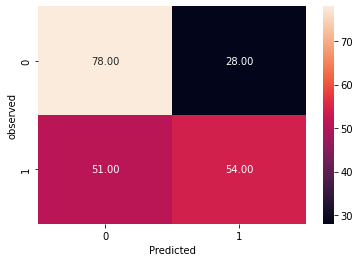

In [77]:
draw_cm(y_test, predictions_knn)

In [78]:
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.60      0.74      0.66       106
           1       0.66      0.51      0.58       105

    accuracy                           0.63       211
   macro avg       0.63      0.63      0.62       211
weighted avg       0.63      0.63      0.62       211



In [79]:
knn_scores = get_metrics_score(knn)

Accuracy on training set :  0.665086887835703
Accuracy on test set :  0.6255924170616114
Recall on training set :  0.5425867507886435
Recall on test set :  0.5142857142857142
Precision on training set :  0.7196652719665272
Precision on test set :  0.6585365853658537
F1_Score :  0.5775401069518715
Roc_Auc_score :  0.6250673854447439


# Bagging Classifier on KNN

In [80]:
baggingknn = BaggingClassifier(knn, random_state = 42)
baggingknn.fit(x_train, y_train)
predictions_bknn = baggingknn.predict(x_test)

In [81]:
print(classification_report(y_test, predictions_bknn))

              precision    recall  f1-score   support

           0       0.62      0.72      0.66       106
           1       0.66      0.55      0.60       105

    accuracy                           0.64       211
   macro avg       0.64      0.63      0.63       211
weighted avg       0.64      0.64      0.63       211



In [82]:
baggingknn_scores = get_metrics_score(baggingknn)

Accuracy on training set :  0.6714060031595577
Accuracy on test set :  0.6350710900473934
Recall on training set :  0.6056782334384858
Recall on test set :  0.5523809523809524
Precision on training set :  0.6981818181818182
Precision on test set :  0.6590909090909091
F1_Score :  0.601036269430052
Roc_Auc_score :  0.6346810422282121


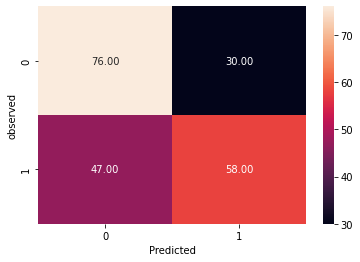

In [83]:
draw_cm(y_test, predictions_bknn)

# Boosting

## AdaBoost

In [84]:
abc = AdaBoostClassifier(random_state = 42)
abc.fit(x_train, y_train)
predictions_abc = abc.predict(x_test)

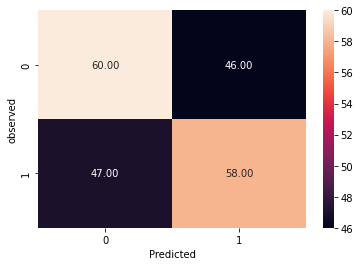

In [85]:
draw_cm(y_test, predictions_abc)

In [86]:
print(classification_report(y_test, predictions_abc))

              precision    recall  f1-score   support

           0       0.56      0.57      0.56       106
           1       0.56      0.55      0.56       105

    accuracy                           0.56       211
   macro avg       0.56      0.56      0.56       211
weighted avg       0.56      0.56      0.56       211



In [87]:
abc_scores = get_metrics_score(abc)

Accuracy on training set :  0.6682464454976303
Accuracy on test set :  0.5592417061611374
Recall on training set :  0.7192429022082019
Recall on test set :  0.5523809523809524
Precision on training set :  0.6532951289398281
Precision on test set :  0.5576923076923077
F1_Score :  0.5550239234449761
Roc_Auc_score :  0.5592093441150046


## XGBoost Classifier

In [88]:
xgb = XGBClassifier(random_state = 42, scale_pos_weight = 1)
xgb.fit(x_train, y_train)
predictions_xgb = xgb.predict(x_test)

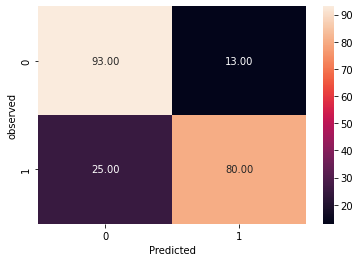

In [89]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

draw_cm(y_test, predictions_xgb)

In [90]:
print(classification_report(y_test, predictions_xgb))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       106
           1       0.86      0.76      0.81       105

    accuracy                           0.82       211
   macro avg       0.82      0.82      0.82       211
weighted avg       0.82      0.82      0.82       211



In [91]:
xgb_scores = get_metrics_score(xgb)

Accuracy on training set :  0.990521327014218
Accuracy on test set :  0.8199052132701422
Recall on training set :  0.9905362776025236
Recall on test set :  0.7619047619047619
Precision on training set :  0.9905362776025236
Precision on test set :  0.8602150537634409
F1_Score :  0.8080808080808081
Roc_Auc_score :  0.8196316262353999


# Choosing the best models

In [92]:
pd.DataFrame(data = {'Random Forest': rf_scores, 'Bagging Random Forest': baggingrf_scores, 'Logistic Regression': logistic_regression_scores, 'KNN': knn_scores, 'Bagging KNN': baggingknn_scores,'AdaBoost': abc_scores, 'XGBoost': xgb_scores}, index = ['Accuracy - Train', 'Accuracy - Test', 'Recall - Train', 'Recall - Test', 'Precision - Train', 'Precision - Test', 'F1', 'ROC'])

,Random Forest,Bagging Random Forest,Logistic Regression,KNN,Bagging KNN,AdaBoost,XGBoost
Accuracy - Train,0.99842,0.969984,0.579779,0.665087,0.671406,0.668246,0.990521
Accuracy - Test,0.838863,0.772512,0.582938,0.625592,0.635071,0.559242,0.819905
Recall - Train,0.996845,0.962145,0.618297,0.542587,0.605678,0.719243,0.990536
Recall - Test,0.819048,0.733333,0.580952,0.514286,0.552381,0.552381,0.761905
Precision - Train,1.0,0.977564,0.57478,0.719665,0.698182,0.653295,0.990536
Precision - Test,0.851485,0.793814,0.580952,0.658537,0.659091,0.557692,0.860215
F1,<function f1_score at 0x7f84bcf7bdd0>,<function f1_score at 0x7f84bcf7bdd0>,<function f1_score at 0x7f84bcf7bdd0>,<function f1_score at 0x7f84bcf7bdd0>,<function f1_score at 0x7f84bcf7bdd0>,<function f1_score at 0x7f84bcf7bdd0>,<function f1_score at 0x7f84bcf7bdd0>
ROC,<function roc_auc_score at 0x7f84bcf74290>,<function roc_auc_score at 0x7f84bcf74290>,<function roc_auc_score at 0x7f84bcf74290>,<function roc_auc_score at 0x7f84bcf74290>,<function roc_auc_score at 0x7f84bcf74290>,<function roc_auc_score at 0x7f84bcf74290>,<function roc_auc_score at 0x7f84bcf74290>


Based on the above chart, Random Forest and XGBoost by far outperform all other models, with the former edging slightly ahead on Accuracy while the latter being superior based on Precision_Test. Also, with a close enough Accuracy on both train and test data, the model does not appear to be overfitting.

We will now Cross-Validate both these models to see the results

# Cross Validation

In [93]:
from sklearn.model_selection import KFold, cross_val_score

clf = RandomForestClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, x, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.72781065 0.68047337 0.72189349 0.79881657 0.98809524]
Average CV Score:  0.783417864187095
Number of CV Scores used in Average:  5


In [94]:
from sklearn.model_selection import KFold, cross_val_score

clf = XGBClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, x, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.76331361 0.73372781 0.75739645 0.84023669 0.98214286]
Average CV Score:  0.8153634826711749
Number of CV Scores used in Average:  5


XGBoost takes a very slight edge after Corss Validation of the results.

However, since the difference in CV is not significant, we will rely on our primary criteria, i.e., Accuracy - based on higher accuracy, Random Forest is our selected model

# ROC Curve Plot

### RandomForest

In [95]:
def plot_roc_curve(y_test, y_pred):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.8387690925426774


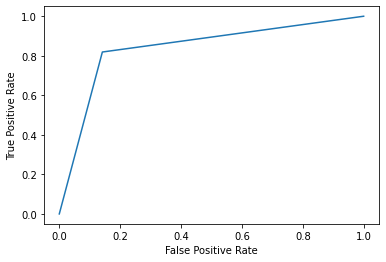

In [96]:
plot_roc_curve(y_test, predictions_rf)
print(f'model 1 AUC score: {roc_auc_score(y_test, predictions_rf)}')

### XGBoost

model 1 AUC score: 0.8196316262353999


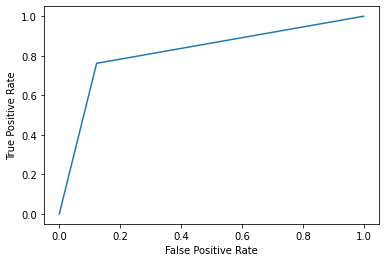

In [97]:
plot_roc_curve(y_test, predictions_xgb)
print(f'model 1 AUC score: {roc_auc_score(y_test, predictions_xgb)}')

### FEATURE IMPORTANCE

### Random Forest

In [98]:

importances=rf.feature_importances_


In [99]:
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df1.columns
 
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) ApplicantIncome                0.408282
 2) CoapplicantIncome              0.214944
 3) Loan_Amount_Term               0.059241
 4) Self_Employed_Yes              0.029094
 5) Property_Area_Rural            0.028015
 6) Loan_Status                    0.026365
 7) Dependents_0                   0.023328
 8) Dependents_1                   0.022921
 9) Property_Area_Semiurban        0.022681
10) Dependents_2                   0.022027
11) Education_Not Graduate         0.020029
12) Married_Yes                    0.019672
13) Self_Employed_No               0.018725
14) Married_No                     0.018395
15) Education_Graduate             0.017152
16) Gender_Male                    0.017074
17) Dependents_3+                  0.016579
18) Gender_Female                  0.015476


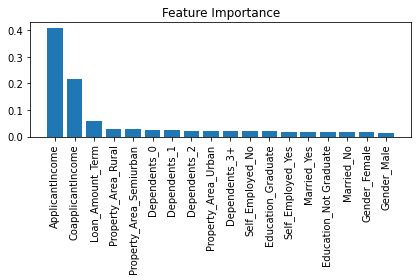

In [100]:
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [101]:
# Based on the above analysis, Random Forest is the best model with the highest accuracy.